This is part of the Question 1. Here you can find the AdaBoostRegressor implementation with output 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostRegressor, cv

In [6]:
df=pd.read_csv("dataprocessed.csv")
print('The shape of our features is:', df.shape)

The shape of our features is: (120915, 10)


In [10]:
df.head(5)

,title,variety,designation,country,province,description,winery,taster_name,points
0,quinta dos avidagos 2011 avidagos red (douro),portuguese red,avidagos,portugal,douro,"this is ripe and fruity, a wine that is smooth...",quinta dos avidagos,roger voss,87
1,rainstorm 2013 pinot gris (willamette valley),pinot gris,unknown,us,oregon,"tart and snappy, the flavors of lime flesh and...",rainstorm,paul gregutt,87
2,st. julian 2013 reserve late harvest riesling ...,riesling,reserve late harvest,us,michigan,"pineapple rind, lemon pith and orange blossom ...",st. julian,alexander peartree,87
3,sweet cheeks 2012 vintner's reserve wild child...,pinot noir,vintner's reserve wild child block,us,oregon,"much like the regular bottling from 2012, this...",sweet cheeks,paul gregutt,87
4,tandem 2011 ars in vitro tempranillo-merlot (n...,tempranillo-merlot,ars in vitro,spain,northern spain,blackberry and raspberry aromas show a typical...,tandem,michael schachner,87


In [8]:
labels=np.array(df['price'])
df=df.drop('price',axis=1)

In [11]:
X=df[['variety', 'designation', 'country', 'province',
       'winery', 'taster_name', 'points']]

X=X.fillna('unknown')
print(X.columns)
categorical_features_indices =[0,1,2,3,4,5]
y=labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, 
                                                    random_state=52)

Index(['variety', 'designation', 'country', 'province', 'winery',
       'taster_name', 'points'],
      dtype='object')


In [12]:
categorical_features_indices

[0, 1, 2, 3, 4, 5]

In [93]:
def perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test):
    model = CatBoostRegressor(
        random_seed = 400,
        loss_function = 'RMSE',
        iterations=100,
    )
    
    model.fit(
        X_train, y_train,
        cat_features = categorical_features_indices,
        eval_set=(X_valid, y_valid),
        verbose=False
    )
    
    print("RMSE on training data: "+ model.score(X_train, y_train).astype(str))
    print("RMSE on test data: "+ model.score(X_test, y_test).astype(str))
    
    return model

In [94]:
model=perform_model(X_train, y_train,X_valid, y_valid,X_test, y_test)

RMSE on training data: 0.5591728787094588
RMSE on test data: 0.3514526190642865


You can see model achieved RMSE(root mean square error) error 0.35 for test set 

In [91]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

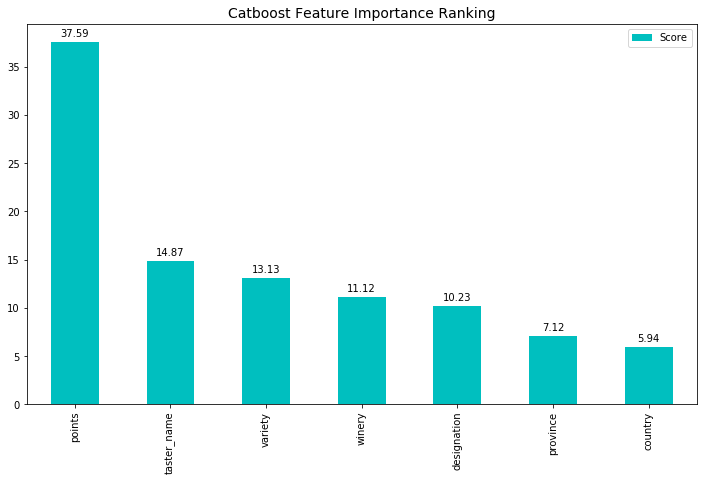

In [92]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

The plot shows where are the important features for our problem. As we expected points are very important and country is not very important as feature.